## **1. Introdução**

Em resumo, o trabalho tem como objetivo avaliar diferentes estratégias de investimento utilizando análise de dados históricos e métricas financeiras, além de implementar algoritmos em Python para replicar essas estratégias. Isso permite comparar o desempenho das estratégias em termos de retorno, risco e eficiência, auxiliando na tomada de decisões de investimento.

## **2. Análise Descritiva dos Dados**

A análise descritiva de dados desempenha um papel fundamental no processo de pesquisa, contribuindo para uma compreensão aprofundada do objeto de estudo. No contexto do presente trabalho, a análise descritiva adquire uma relevância significativa ao oferecer percepções significativas sobre a série histórica dos retornos diários de cinco ativos que estruturam os portifólios que serão apresentados adiante. Essa análise inicial foca em enteder as séries das ações separademente, visto que nas sessões futuras o objeto de estudo passa a ser os possíveis portifólios que podem ser elaborados a partir desses ativos.

Começaremos a análise compreendendo os valores apresentados pela série histórica disponibilizada, no caso, retornos diários de cinco ativos da Bovespa no período de 2010 a 2022. Ou seja, temos os valores da variação percentual diária do preço desses ativos, que pode ser interpretada através da sequinte equação:

$$ \text{Retorno Diário} = \frac{P^i_f - P^i_a}{P^i_a} \times \frac{1}{100}, \ \ \ \text{com} \ \ \ i \in L \colonequals \{A, B, C, D, E\} $$

onde $P^i_f$ é o preço de fechamento do do ativo $i$ e $P^i_a$ é o preço de abertura do ativo $i$.
Dessa forma, a série disponibilizada apresenta seus valores em forma de porcentagem, sendo os positivos interpretados como uma variação percentual positiva no preço da ação no dia, e os negativos uma variação percentual negativa no preço da ação do dia.

Além disso, ao analisarmos os valores referentes as datas correspondentes a essas variações percentuais, podemos perceber que a série utiliza como base os dias úteis do ano, 252 ao todo. O que faz sentido se tratando dos preços de ativos da Bovespa, que não opera aos finais de semana.

Agora que os valores da base de dados foram compreendidos, é possível dar início à própria análise descritiva. Para tal, a importação inicial de algumas bibliotecas se faz necessária a fim de auxiliar nesse processo. É válido ressaltar que, embora nem todas as bibliotecas a seguir sejam empregadas nesta seção, todas aquelas que desempenharão um papel ao longo deste trabalho serão apresentadas por uma questão de simplicidade.

In [182]:
# Importando bibliotecas
import pandas as pd # Pandas: usado para manipular dados tabulares no Python.
import matplotlib.pyplot as plt # Matplotlib: usado para criação de gráficos.
import numpy as np # Numpy:  manipular e processar eficientemente arrays multidimensionais e realizar operações numéricas.
import seaborn as sns # Seaborn: criar visualizações estatísticas
import matplotlib.dates as mdates # matplotlib.dates: módulo dentro da biblioteca Matplotlib que fornece funcionalidades para lidar com datas e horários em gráficos. 
from scipy.optimize import minimize # Importa a função 'minimize' do módulo 'optimize' da biblioteca SciPy, que é usada para encontrar o valor mínimo de uma função.

Com as devidas bibliotecas importadas, é possível seguir para a importação da base de dados.

In [183]:
# Importando e visualizando a base

# Criando uma variável com o caminho da base de dados da série de retornos diários
path = '...\\series_retornos.csv'

# Carregando a base e transformando em um DataFrame com a função 'read_csv' da biblioteca 'pandas'
dataframe = pd.read_csv(path)

# Visualizando a base
dataframe

,year;month;day;A;B;C;D;E
0,2010;1;5;0.005882352941174673;0.00648055832502...
1,2010;1;6;0.010201429499675951;-0.0086676572560...
2,2010;1;7;0.004695439634657017;-0.0102423182613...
3,2010;1;8;-0.0019206145966712551;-0.01514386673...
4,2010;1;11;-0.012187299550994513;-0.00871348026...
...,...
3212,2022;12;23;0.01386962552011095;0.0157258064516...
3213,2022;12;26;-0.0068399452804377425;-0.019849146...
3214,2022;12;27;0.0;-0.00567031186715139;0.00681635...
3215,2022;12;28;0.0020661157024794985;0.02036659877...


A partir desse primeiro output é possível perceber que a visualização da base não está tão clara (temos apenas uma coluna de dados). De forma a corrigir esta questão, serão feitas algumas modificações. A primeira delas é alterar o separador padrão de colunas para " ; " (a biblioteca pandas utiliza " , " como padrão). Isso permitirá que sejam feitas as separações de colunas corretamente.

In [184]:
# Modificando um pouco a base
# Mudandando o separador padrão para ';'
dataframe = pd.read_csv(path, sep = ';')

# Visualizando a base
dataframe

,year,month,day,A,B,C,D,E
0,2010,1,5,0.005882,0.006481,-0.008574,0.009322,-0.002182
1,2010,1,6,0.010201,-0.008668,0.013514,0.021166,0.005467
2,2010,1,7,0.004695,-0.010242,-0.009333,0.004145,0.016857
3,2010,1,8,-0.001921,-0.015144,-0.005384,0.009758,0.036364
4,2010,1,11,-0.012187,-0.008713,-0.003248,-0.002973,-0.011352
...,...,...,...,...,...,...,...,...
3212,2022,12,23,0.013870,0.015726,0.047103,0.006647,-0.011299
3213,2022,12,26,-0.006840,-0.019849,-0.007166,0.009152,-0.008052
3214,2022,12,27,0.000000,-0.005670,0.006816,0.023878,-0.004713
3215,2022,12,28,0.002066,0.020367,-0.012346,-0.002242,0.018153


Separadas as colunas iremos agora adicionar uma nova variável à base dados. Originalmente, temos a data de cada retorno divida em 3 colunas, cada uma referente ao dia, mês e ano do retorno em questão, será criada uma nova coluna "date" que mostrará a data completa (no formado MM-DD-AAAA) de cada retorno. Essa colua facilitará a construção dos gráficos das séries históricas dos retornos diários dos ativos que serão apresentados posteriormente.

In [185]:
# Criando uma coluna com data completa no formato "MM-DD-AAAA"

# 'dataframe['date']' cria uma nova coluna para a base com o nome 'date'

# A Função to_datetime da biblioteca pandas cria uma nova coluna de datas, convertendo as colunas 'day', 'month' e 'year' 
# do DataFrame em um objeto de data e hora, resultando em uma coluna que contém datas completas.

# Utiliza-se o método 'strftime' (string format time) para formatar as datas no formato '%m-%d-%Y' (MM-DD-AAAA)

dataframe['date'] = pd.to_datetime(dataframe[['day', 'month', 'year']]).dt.strftime('%m-%d-%Y')

# Visualizando a base
dataframe

,year,month,day,A,B,C,D,E,date
0,2010,1,5,0.005882,0.006481,-0.008574,0.009322,-0.002182,01-05-2010
1,2010,1,6,0.010201,-0.008668,0.013514,0.021166,0.005467,01-06-2010
2,2010,1,7,0.004695,-0.010242,-0.009333,0.004145,0.016857,01-07-2010
3,2010,1,8,-0.001921,-0.015144,-0.005384,0.009758,0.036364,01-08-2010
4,2010,1,11,-0.012187,-0.008713,-0.003248,-0.002973,-0.011352,01-11-2010
...,...,...,...,...,...,...,...,...,...
3212,2022,12,23,0.013870,0.015726,0.047103,0.006647,-0.011299,12-23-2022
3213,2022,12,26,-0.006840,-0.019849,-0.007166,0.009152,-0.008052,12-26-2022
3214,2022,12,27,0.000000,-0.005670,0.006816,0.023878,-0.004713,12-27-2022
3215,2022,12,28,0.002066,0.020367,-0.012346,-0.002242,0.018153,12-28-2022


Ajustada a base, podemos seguir para a análise de fato. Iniciaremos nossa descrição a partir de algumas estatísticas simples, porém muito valiosas, acerca da série temporal em questão. Serão apresentadas os valores máximo e mínimo de cada série de retorno diário, bem como suas datas correspondentes. Serão apresentadas, também, as médias, medianas e desvios-padrão de cada ativo.

In [186]:
# Estatísticas descritivas
lista_ativos = ['A', 'B', 'C', 'D', 'E']  # É definida uma lista chamada lista_ativos que contém os nomes dos ativos financeiros para os quais as estatísticas serão calculadas.

# São criadas novas variáveis com estatísticas simples dos retornos dos ativos
max_returns = dataframe[lista_ativos].idxmax() # Valor máximo
min_returns = dataframe[lista_ativos].idxmin() # Valor mínimo
mean_returns = dataframe[lista_ativos].mean() # Média dos valores
med_returns = dataframe[lista_ativos].median() # Mediana dos valores
std_returns = dataframe[lista_ativos].std() # Desvio-padrão dos valores
var_returns = dataframe[lista_ativos].var() # Variância dos valores

for ativo in lista_ativos:
    print(f"\nAtivo: {ativo}")
    print(f"Maior retorno: {str(dataframe[ativo][max_returns[ativo]])[:7]} - Data: {dataframe['date'][max_returns[ativo]]}")
    print(f"Menor retorno: {str(dataframe[ativo][min_returns[ativo]])[:7]} - Data: {dataframe['date'][min_returns[ativo]]}")
    print(f"Retorno diário médio: {str(mean_returns[ativo])[:7]}")
    print(f"Mediana dos retornos: {str(med_returns[ativo])[:7]}")
    #print(f"Variância dos retornos: {str(var_returns[ativo])[:7]}")
    print(f"Desvio padrão dos retornos: {str(std_returns[ativo])[:7]}\n")
    print("="*42)

# Existem funções específicas que geram essas estatísticas automaticamente, contudo decidi fazer dessa maneira para que os valores fossem
# armazenados em variáveis, facilitando o uso posterior desses dados.



Ativo: A
Maior retorno: 0.11292 - Data: 12-10-2012
Menor retorno: -0.1578 - Data: 03-12-2020
Retorno diário médio: 0.00054
Mediana dos retornos: 0.0
Desvio padrão dos retornos: 0.01644


Ativo: B
Maior retorno: 0.11059 - Data: 03-13-2020
Menor retorno: -0.1204 - Data: 05-18-2017
Retorno diário médio: 0.00052
Mediana dos retornos: 0.00027
Desvio padrão dos retornos: 0.01966


Ativo: C
Maior retorno: 0.22222 - Data: 03-13-2020
Menor retorno: -0.2969 - Data: 03-09-2020
Retorno diário médio: 0.00061
Mediana dos retornos: 0.00075
Desvio padrão dos retornos: 0.02917


Ativo: D
Maior retorno: 0.21357 - Data: 03-13-2020
Menor retorno: -0.2452 - Data: 01-28-2019
Retorno diário médio: 0.00073
Mediana dos retornos: 0.0
Desvio padrão dos retornos: 0.02615


Ativo: E
Maior retorno: 0.13894 - Data: 07-22-2020
Menor retorno: -0.2061 - Data: 03-16-2020
Retorno diário médio: 0.00111
Mediana dos retornos: 0.00035
Desvio padrão dos retornos: 0.02014



A partir desses dados podemos perceber alguns fatores interessantes. A maioria das ações teve seu valor máximo e mínimo de retorno diário em março de 2020, o que é explicado pelo o impacto da pandemia da Covid-19 na economia brasileira. Além disso, é possível observar o desvio padrão dos ativos para identificar aquele com maior risco atrelado, já que esse valor é considerado como uma medida de risco, pois expressa o grau de dispersão de um conjunto de dados. Sendo assim, a ação mais arriscada foi a 'D', com desvio padrão de 0.02917. Vale ressaltar que essa é uma análise simplificada pois, embora um desvio padrão maior geralmente indique maior volatilidade e, portanto, um potencial maior para flutuações de preços, ele não considera todos os aspectos do risco.

Em seguida são gerados os histogramas referentes a frequência de retorno de cada ativo. A partir desses gráficos é possível perceber que todas as ações seguem uma distribuição normal quanto sua frequência de retorno.

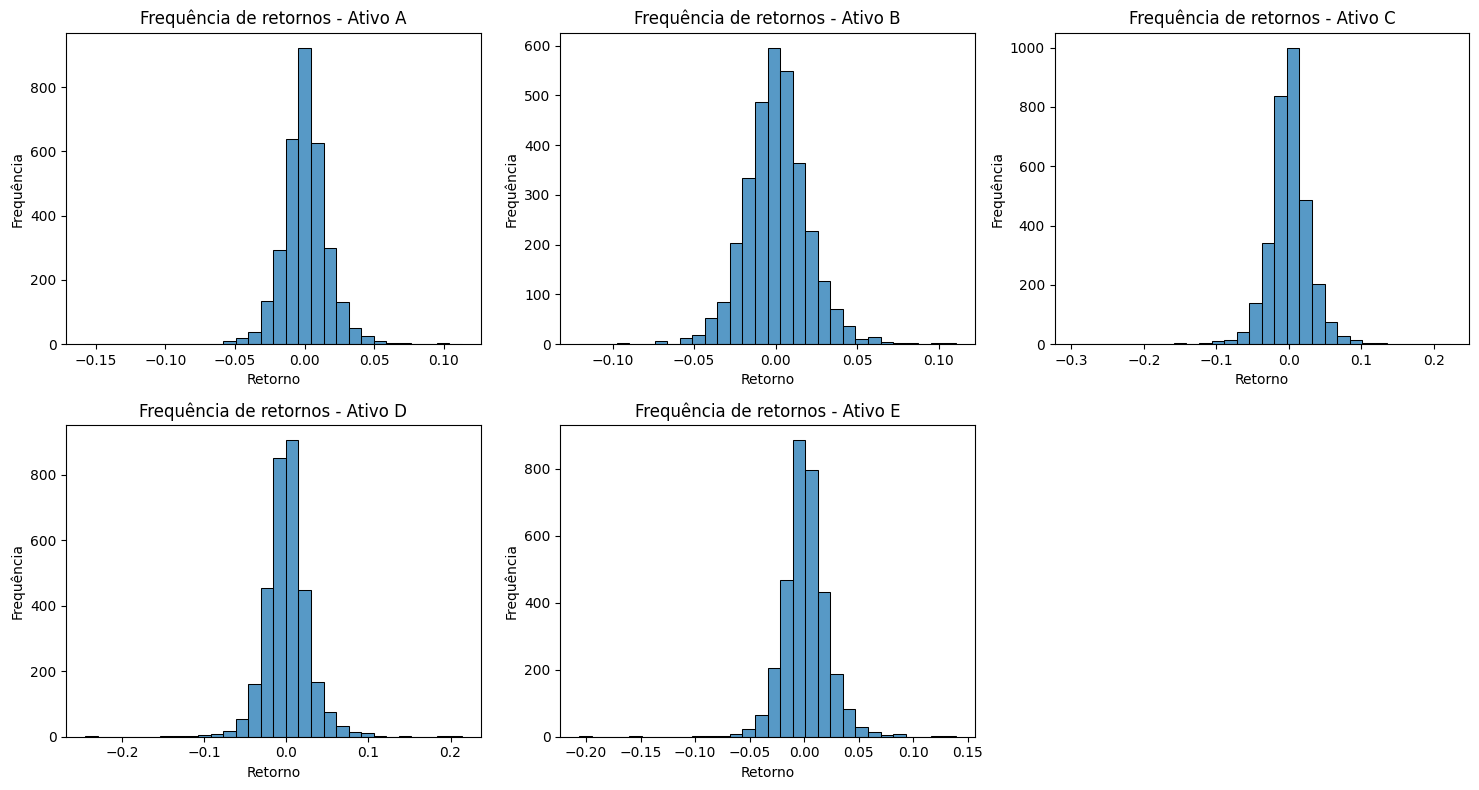

In [187]:
# Plot frequência de retornos

# Cria uma figura e eixos para os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Transformando a matriz de subplots em uma matriz unidimensional para acessar os subplots mais facilmente usando um único índice.
axes = axes.flatten()

# Plota os 5 ativos nos subplots da matriz 2x3
for idx, ativo in enumerate(lista_ativos):
    sns.histplot(dataframe[ativo], bins = 30, kde = False, ax = axes[idx]) # Isso cria um histograma do retorno do ativo atual com 30 intervalos* 
    axes[idx].set_title(f'Frequência de retornos - Ativo {ativo}')
    axes[idx].set_xlabel('Retorno')
    axes[idx].set_ylabel('Frequência')

# Ajusta o layout dos subplots
plt.tight_layout()

# Remove o último subplot vazio
fig.delaxes(axes[-1])

# Mostra os gráficos
plt.show()

# * Regra de Rice: 30 (duas vezes a ráiz cúbica do tamanho da amostra)

Agora, serão mostradas as séries históricas dos ativos. Com elas, podemos perceber o ruído presente no começo de 2020 que representa, como dito anteriormente, o impacto da pandemia da Covid-19 na economia brasileira. Além disso, é possível perceber que todas as séries são, aparentemente, estacionárias, ou seja, não possuem tendência temporal. Vale ressaltar que a análise das séries foi feita superficialmente, já que não é o foco do trabalho. É importante ter em mente que a estacionariedade envolve mais do que apenas a ausência de tendência, também envolve a estabilidade das propriedades estatísticas ao longo do tempo e, para determinar se uma série é estacionária, é necessário realizar testes estatísticos específicos, como o Teste de Dickey-Fuller. Novamente, este não é o intuito primeiro do trabalho.

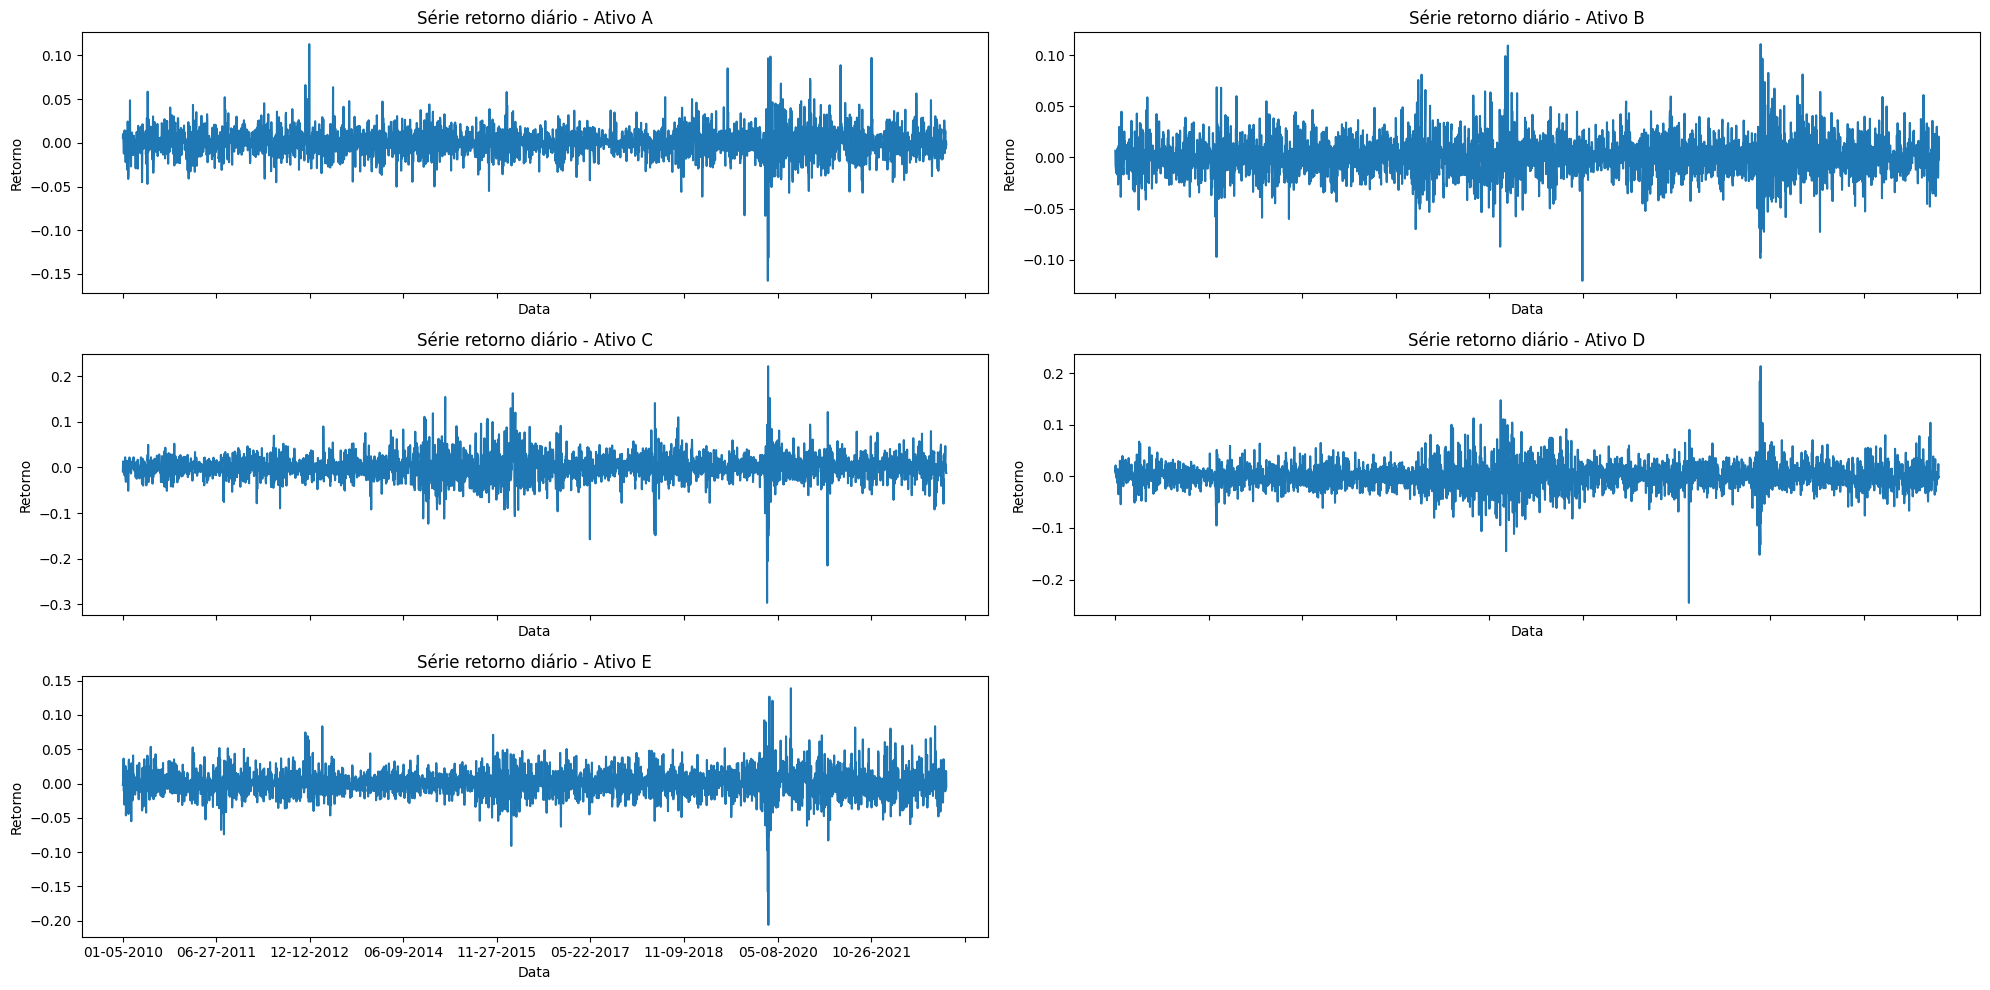

In [188]:
# Plot das séries históricas do retornos diários dos ativos

plt.rcParams["figure.figsize"] = [20, 10]  # Tamanho de cada gráfico

# Calcula o número de subplots necessários com base no número de ativos
num_subplots = len(lista_ativos)

# Cria uma grade de subplots com 3 linhas e 2 colunas (ou o número necessário)
num_linhas = (num_subplots + 1) // 2  # Calcula o número de linhas de subplots necessário, arredondando para cima.
fig, axs = plt.subplots(num_linhas, 2, sharex = True)

# Achatando a matriz de eixos para acessar cada subplot individualmente
axs = axs.flatten()

for i, ativo in enumerate(lista_ativos):
    serie_do_ativo = dataframe.set_index('date')[ativo] # Extrai a série de retornos diários para o ativo atual do DataFrame ('date' como índice)
    axs[i].plot(serie_do_ativo.index, serie_do_ativo.values) # Plota a série de retornos diários no subplot correspondente.
    axs[i].set_xlabel('Data')
    axs[i].set_ylabel('Retorno')
    axs[i].set_title(f'Série retorno diário - Ativo {ativo}')
    axs[i].xaxis.set_major_locator(mdates.YearLocator(base=1)) # Define o localizador de intervalo do eixo x para mostrar os anos de forma legível.

# Remover subplots extras, se houver
for i in range(num_subplots, num_linhas * 2):
    fig.delaxes(axs[i])

# Ajuste de layout
plt.tight_layout()

# Mostrar a figura
plt.show()

Por último, analisaremos as correlações desses ativos. Essa análise se faz importante ao passo que escolher ativos com correlações diferentes pode reduzir o risco da carteira global, uma vez que ativos com baixa correlação podem compensar as quedas de outros ativos em momentos de turbulência no mercado. 

Pelo fato de o retorno esperado de uma carteira (de igual peso) ser a média ponderada dos retornos esperados de seus componentes, e de seu desvio-padrão ser inferior à média ponderada dos desvios-padrão dos componentes, as carteiras de ativos não perfeitamente correlacionados sempre obterão algum grau de benefício com a diversificação. Quanto menor a correlação entre os ativos, maior o ganho em eficiência.

No caso dos ativos em questão temos uma correlação positiva entre todos eles, como mostrado pelo gráfico abaixo, o que indica que eles tendem a se mover na mesma direção.

<Axes: >

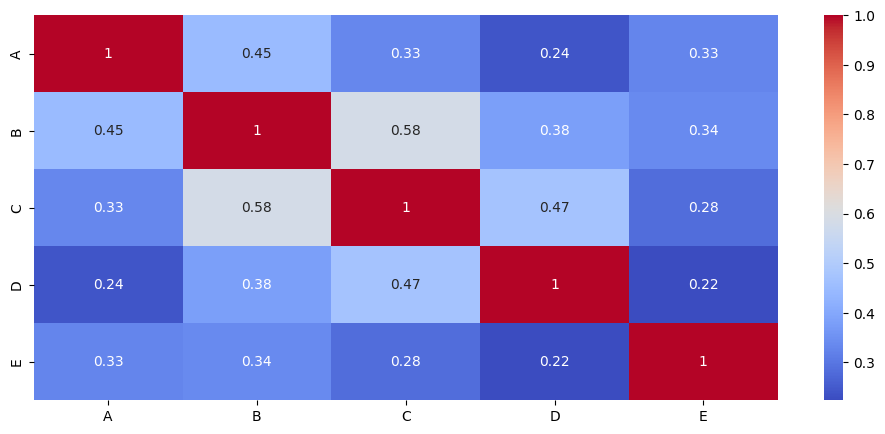

In [189]:
# Correlação - Plot 1
plt.figure(figsize = (12,5))
sns.heatmap(data = dataframe[lista_ativos].corr(), cmap = 'coolwarm', annot = True)

Uma outra maneira de visualizarmos a correlação entre os ativos é a partir do seguinte gráfico:

c:\Users\otavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


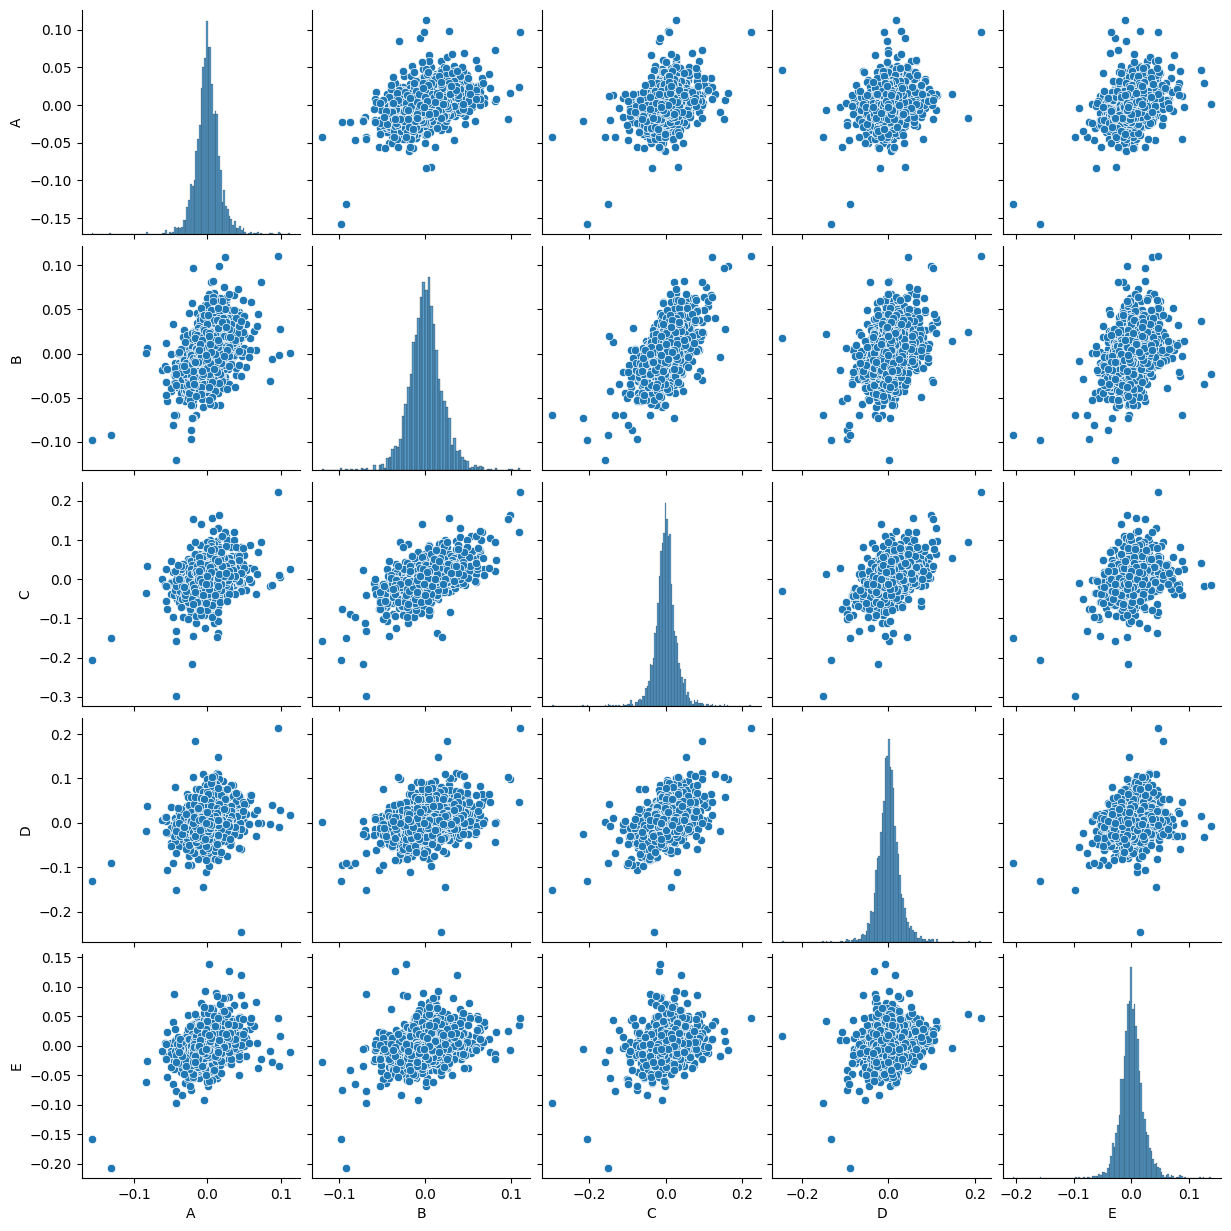

In [190]:
# Correlação - Plot 2
sns.pairplot(dataframe[lista_ativos])

## **3. Primeiro Cenário**

Nesta seção, realizaremos a análise de uma carteira de ativos com alocação igualmente ponderada (equally weighted) dos ativos descritos na seção anterior. O objetivo principal é avaliar o desempenho e o perfil de risco dessa carteira ao longo do tempo. Para isso, são calculados o retorno anualizado, a volatilidade anualizada, o índice de Sharpe e o máximo Drawdown da carteira. Essas métricas permitirão compreender melhor como a carteira se comporta em termos de retorno e risco.

Primeiramente, é criada uma nova variável denominada 'carteira_1', que representa a série histórica de retornos diários de uma carteira composta pelas 5 ações em questão, onde todas possuem o mesmo peso. Fixando um horizonte temporal dado por $t \in T \colonequals \{0,1,\ldots, 3216\}$, essa série histórica foi obtida da seguinte mandeira:

$$ r_p = \frac{1}{5}\times\sum_{i\in L}r_i $$

onde $r_p$ é o retorno diário do portifólio e $r_i$ é o retorno diário do ativo $i$, ambos no instante $t$ (o indice $t$ é omitido na equação por motivos de simplificação). Ou seja, o valor do retorno diário do portifólio é a média desses valores para os ativos que o compõem. Isso se deve ao fato de estarmos num cenário de alocação de igual peso.

In [191]:
# Adicionando a carteira equally weighted à base de dados

dataframe['carteira_1'] = dataframe[lista_ativos].mean(axis=1) # Média simples
lista_ativos.append('carteira_1') # Adiciona 'carteira_1' ao dataframe

dataframe

,year,month,day,A,B,C,D,E,date,carteira_1
0,2010,1,5,0.005882,0.006481,-0.008574,0.009322,-0.002182,01-05-2010,0.002186
1,2010,1,6,0.010201,-0.008668,0.013514,0.021166,0.005467,01-06-2010,0.008336
2,2010,1,7,0.004695,-0.010242,-0.009333,0.004145,0.016857,01-07-2010,0.001224
3,2010,1,8,-0.001921,-0.015144,-0.005384,0.009758,0.036364,01-08-2010,0.004735
4,2010,1,11,-0.012187,-0.008713,-0.003248,-0.002973,-0.011352,01-11-2010,-0.007695
...,...,...,...,...,...,...,...,...,...,...
3212,2022,12,23,0.013870,0.015726,0.047103,0.006647,-0.011299,12-23-2022,0.014409
3213,2022,12,26,-0.006840,-0.019849,-0.007166,0.009152,-0.008052,12-26-2022,-0.006551
3214,2022,12,27,0.000000,-0.005670,0.006816,0.023878,-0.004713,12-27-2022,0.004062
3215,2022,12,28,0.002066,0.020367,-0.012346,-0.002242,0.018153,12-28-2022,0.005200


Em seguida, é apresentado o gráfico da série histórica referente a "carteira_1". A análise é semelhante a feita em relação aos ativos na seção anterior.

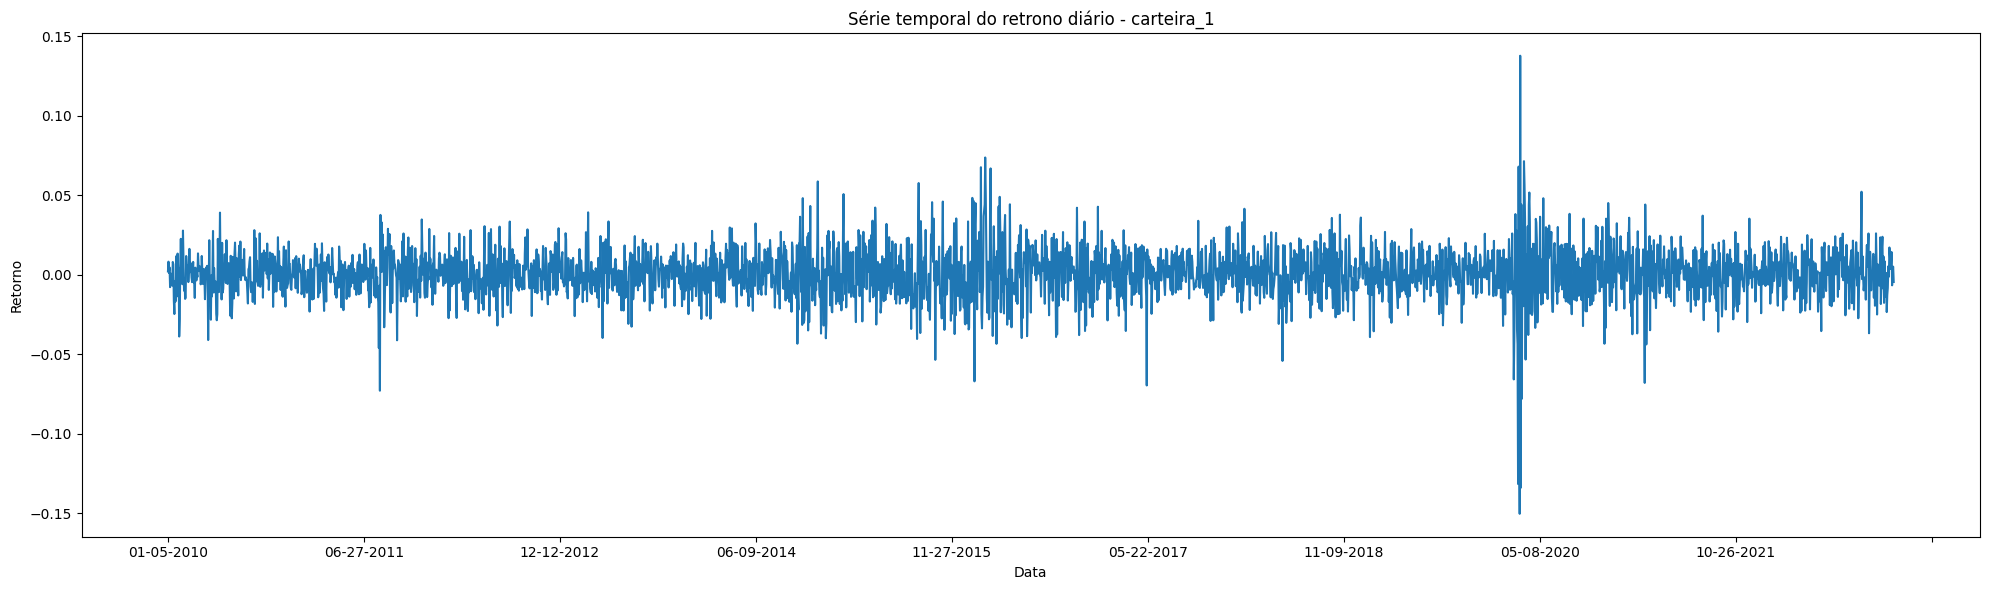

In [192]:
# Série histórica dos retornos diários de 'carteira_1'

# Criando uma função de dois parâmetros ('série temporal', 'nome da série')
def plot_stock(serie, stock_name):
    plt.rcParams["figure.figsize"] = [20, 6]
    plt.plot(serie.index, serie.values)
    plt.xlabel('Data')
    plt.ylabel('Retorno')
    plt.title(stock_name)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(base = 1))  # Define a frequência dos rótulos

serie_da_carteira = dataframe.set_index('date')['carteira_1']

plot_stock(serie_da_carteira, 'Série temporal do retrono diário - carteira_1')

# Ajuste de layout
plt.tight_layout()

# Mostrar a figura
plt.show()

Com isso em mãos, iniciamos a formulação das informações solicitadas. Começando pelo retorno anualizado da carteira, que nada mais é do que a média geométrica dos retornos anuais dessa carteira. A seguinte equação nos mostra como o cálculo é feito:

$$ {RA}_p = \Bigg(\prod_{a = 1}^n R_a \Bigg)^{1/n}$$

onde $RA_p$ é o retorno anualizado do portifólio, $n$ é o número de anos (quatidade de observações de retornos anuais) e $R_a$ é o retorno anual do portifólio no instante $a$. 

Essa medida fornece uma medida mais precisa do desempenho médio da carteira ao longo do tempo, levando em consideração a composição dos retornos e suas variações ao longo dos anos. Isso é particularmente útil para investidores que desejam avaliar o crescimento de seus investimentos de forma mais realista em vez de apenas calcular uma média simples dos retornos anuais.

Para o cálculo do retorno anualizado da nossa carteira equally weighted foi necessário fazer uma modificação quanto a proporção dos valores da base. Como o retorno anualizado se trata de uma raíz n-ésima (no caso $n =12$) de um produtório, teriámos o resultado como sendo um valor $x$ onde $x$ é composto por uma parte imaginária, o que dificultaria nossa análise.

Como forma de solucionar esse problema, foi somado $1$ a todos os valores da base, ou seja, agora valores negativos do retorno anual são representados como números menores que $1$, já os positivos valores maiores que $1$. Por exemplo, antes um retorno negativo de $10%$ era representado como $-0,1$, com a modificação temos que essa variação é representada por $0,9$.

Como Resultado, obtivemos que o retorno anualizado dessa carteira doi de $15,8\%$.

In [336]:
# Retorno Anualizado (média geométrica)

retorno_anualizado = np.prod(np.array(dataframe['carteira_1']) + 1) ** (252 / len(dataframe['carteira_1'])) - 1

print(f'Retorno anualizado: {retorno_anualizado * 100:.3f}%')

# Como estamos usado dados diários para o cálculo, o expoente deve ser 252/n (dias letivos do ano) ao invés de 1/n
# Usariamos 1/n caso utilizassemos dados anuais

Retorno anualizado: 15.794%


Olharemos agora para a volatilidade anualizada, que é uma medida que ajuda os investidores a entender o grau de flutuação dos retornos desse portfólio ao longo de um ano. Ela é uma métrica importante para avaliar o risco associado a um investimento, pois indica o quão instável ou volátil o portfólio tem sido historicamente. Dessa forma temos que:

$$ VA_p = \sigma_p \sqrt{252} $$
onde $VA_p$ é a volatilidade anualizada do portifólio, $\sigma_p$ é o desvio-padrão dos retornos diários dessa carteria.

Como resultado, obtivemos uma volatilidade anualizada de $25\%$.

In [337]:
# Volatilidade anualizada

vol = (dataframe['carteira_1'].std()) # Volatilidade - desvio padrão retorno diário
volan = vol * np.sqrt(252) # Volatilidade anualizada - desvio padrão * sqrt(252)

print(f'Volatilidade anualizada: {volan * 100:.3f}%')


Volatilidade anualizada: 25.084%


Partimos, então, para análise do índice de Sharpe. A importância do trade-off entre recompensa (o prêmio de risco) e o risco (medido pelo desvio padrão) indica que medimos a atratividade de uma carteira com base no índice de prêmio de risco e desvio-padrão dos retornos em excesso. Dessa forma, surge o indice de Sharpe, que é uma ferramenta fundamental para a análise de investimentos que busca encontrar o equilíbrio entre recompensa e risco. 

Ele avalia a atratividade de uma carteira de investimentos ao medir a diferença entre o retorno obtido (recompensa) e a volatilidade (risco) dos retornos dessa carteira. Quanto maior o índice de Sharpe, mais atrativa é a carteira, pois isso indica que está gerando um retorno superior em relação à sua volatilidade. A equação do índice de Sharpe é dada por:

$$ S_p = \frac{E[R_p - r_f]}{\sigma_{\hat{p}}} $$
onde $S_p$ é o indice de Sharpe, $\sigma_{\hat{p}}$ é o desvio padrão do retorno em excesso do portifólio (retorno diário do portifólio menos retorno diário do ativo livre de rsico) e $r_f$ é o ativo livre de risco, no nosso caso o CDI com rendimento anual de $13,15\%$. A normalidade dos retornos em excesso nos garante que o desvio-padrão é uma medida completa de risco e, portanto, o índice de Sharpe é uma medida completa de desempenho de carteira.

Como resultado, obtivemos um indice de Sharpe de $0.013$

In [344]:
# Indice de Sharpe

risk_free = (1 + 0.1315) ** (1/252) - 1 # Trazendo o retorno do ativo livre de risco em base diária

excess = dataframe['carteira_1'] - risk_free 
excess_m = excess.mean() # Prêmio pelo risco

vol_excess = excess.std() # Desvio padrão do retorno em excesso do portifólio

sharpe = excess_m / vol_excess # Índice de Sharpe

print(f'Índice de Sharpe: {sharpe:.5f}')


Índice de Sharpe: 0.01375


Por último, calculamos o máximo Drawdown do nosso portifólio equally weighted. Essa métrica descreve a maior perda percentual já experimentada por uma carteira em relação ao seu pico anterior. Em outras palavras, o máximo Drawdown representa a maior queda no valor da carteira de investimentos em relação ao seu ponto mais alto até o momento da análise. Para computar o máximo Drawdown, fixa-se um horizonte temporal onde $0<t\leq H$, seja $p_t$ o preço do ativo no tempo $t$, temos que o máximo Drawdown ($MDD$) durante o período $H$ é definido como:

$$ MDD = \max_{0 \leq k \leq j \leq H} \bigg(\frac{p_k - p_j}{p_k}\bigg) $$

Repare na semelhança entre essa equação e a equação do retorno diário de um ativo mostrado inicialmente. Assim, é possível entender que o máximo Drawdown busca o menor valor de retorno diário no nosso caso, ou seja, a maior variação negativa vivenciada pela carteira.

Como resultado, obtivemos um máximo Drawdown de $23.9\%$, a maior variação negativa que essa carteira obteve.

In [353]:
# Máximo Drawdown
valor_base = 1

dataframe['Valor_Acumulado'] = valor_base * (dataframe['carteira_1'] + 1)

dataframe['Drawdown'] = (dataframe['Valor_Acumulado'].cummax() - dataframe['Valor_Acumulado']) / dataframe['Valor_Acumulado'].cummax()
max_drawdown = dataframe['Drawdown'].max()

print(f'Máximo Drawdown: {max_drawdown * 100:.3f}%')


Máximo Drawdown: 23.888%


## **4. Segundo Cenário**

### 4.1. Contextualização

Na última seção, consideramos a diversificação ingênua utilizando carteiras igualmente ponderadas de 5 títulos. Agora é o momento de analisarmos a diversificação eficiente, na qual construímos uma carteira para oferece o menor risco possível para seu nível de retorno esperado.

Considerando um horizonte temporal dado por $t \in \{0,1,\ldots, 3216\}$ a taxa de retrono diária da nossa carteira ponderada será dada por:

$$ R_p = \sum_{i \in L} w_ir_i \ \ \ \text{com} \ \ \ i \in L \colonequals \{A, B, C, D, E\} $$

onde $R_p$ é o retorno diário do portifólio no instante $t$, $w_i$ é o peso atribuído ao ativo $i$ e $r_i$ é o retorno diário do ativo $i$ no período $t$. Novamente, por motivos de simplificação, o índice de tempo foi ocultado da equação.

O retorno diário esperado da carteira no instante $t$ é a média ponderada dos retornos esperados dos títulos componentes, sendo proporção da carteira os pesos utilizados na ponderação da média.

$$ E\big[R_p\big] = \sum_{i \in L} w_iE\big[r_i\big] $$

A variância do retorno carteira, diferentemente do retorno esperado, não é uma média ponderada das variâncias dos ativos individuais como no caso do portifólio equally weighted.

$$ \sigma_p^2 = \sum_{i \in L} \sum_{j \in L} w_i w_j  \text{Cov}(r_i,r_j), \ \ \ \text{com } i \not = j\ \ \$$

Expressa em palavras, a variância da carteira é a soma ponderada de covariâncias e cada peso é 
o produto das proporções na carteira do par de ativos no termo da covariância.

### 4.2. Índice de Sharpe

A carteira que otimiza o índice de Sharpe representa a solução ideal para o problema de alocação de ativos. O índice de Sharpe, que pode ser interpretado como a inclinação da CAL (Capital Allocation Line), desempenha um papel fundamental na busca pela alocação de capital mais eficiente. Em nossa busca por otimização, buscamos trabalhar com a CAL que oferece a inclinação mais elevada ou o índice de Sharpe mais alto. Quanto maior for a inclinação da CAL, maior será o retorno esperado correspondente a qualquer nível de volatilidade.

O objetivo é encontrar os pesos $w_i$ resultantes na maior inclinação da CAL. Portanto, a função-objetivo é o índice de Sharpe. Quando maximizamos a função-objetivo, $S_p$, temos de satisfazer a restrição de que a soma dos pesos da carteira seja $1$. Portanto, solucionamos um problema de otimização 
formalmente expresso como

$$ \max_{w_i}  S_p = \frac{E[r_p] - r_f}{\sigma_p}, \ \ \ \text{s.a.} \ \ \ \sum_{i \in L} w^i = 1$$

Com isso em mente, partimos para o cálculo dos pesos que maximizam nosso índice de Sharpe.

In [366]:
# Retorno esperado dos ativos

lista_ativos = ['A', 'B', 'C', 'D', 'E']

re = [] # Lista vazia que vai receber o valor esperado do retorno dos ativos
va = [] # Lista vazia que vai receber a variância do retorno dos ativos

# Calculando os valores esperados dos retornos dos ativos e utilizando um loop para adiciona-los na lista vazia correspondente 
for ativo in lista_ativos:
    m = str(mean_returns[ativo]) 
    re.append(m)

# Mesma coisa para variância
for ativo in lista_ativos:
    n = str(var_returns[ativo])
    va.append(n)

# Transformando as listas em dataframes
df1 = pd.DataFrame(re)
df2 = pd.DataFrame(va)
la = pd.DataFrame(lista_ativos)

# Juntando todos os dataframes num só
df = pd.concat([la, df1, df2], axis=1)

# Mudando o nome das colunas
df.columns = ['Ativo', 'E[ri]', 'Var[ri]']

# Vizualisando 
df

,Ativo,E[ri],Var[ri]
0,A,0.0005491876018274991,0.00027043436282297274
1,B,0.0005253944851886813,0.00038667782189676076
2,C,0.0006149671922294804,0.0008511474644493362
3,D,0.0007345215063620001,0.0006839653680306445
4,E,0.0011137786786466672,0.00040601704407861744


In [375]:
# Importando os valores de 'df' manualmente para criar uma variável correpondete a cada um
esp_A, esp_B, esp_C, esp_D, esp_E = 0.0005491876018274991, 0.0005253944851886813, 0.0006149671922294804, 0.0007345215063620001, 0.0011137786786466672
var_A, var_B, var_C, var_D, var_E = 0.00027043436282297274, 0.00038667782189676076, 0.0008511474644493362, 0.0006839653680306445, 0.00040601704407861744

# Definindo a taxa livre de risco diária
risk_free = (1 + 0.1315) ** (1/252) - 1

# É definida a função que queremos maximizar, no caso, o índice de Sharpe
def objetivo(x):
    sharpe_ratio = ((x[0]*esp_A + x[1]*esp_B + x[2]*esp_C + x[3]*esp_D + x[4]*esp_E) - risk_free) / \
                  np.sqrt((x[0]**2)*(var_A**2) + (x[1]**2)*(var_B**2) + (x[2]**2)*(var_C**2) + (x[3]**2)*(var_D**2) + (x[4]**2)*(var_E**2))
    return -sharpe_ratio  # Maximizar o Índice de Sharpe é o mesmo que minimizar seu negativo

# Definindo a restrição de soma igual a 1
def restricao_soma(x):
    return np.sum(x) - 1.0

# Definindo os limites mínimos para cada variável (não podem ser negativos)
limites_minimos = [(0, None)] * 5  # O segundo valor "None" significa que não há limite superior

# Valores arbitrários iniciais das variáveis
x0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Definindo a restrição de soma como igualdade
restricao = {'type': 'eq', 'fun': restricao_soma}

# Chamando a função de minimização com as restrições de soma e limites mínimos
resultado = minimize(objetivo, x0, method='SLSQP', constraints=restricao, bounds=limites_minimos)

# Resultados
print(f"Pesos ótimos para os ativos: {resultado.x}")
print("Valor máximo do Índice de Sharpe:", -resultado.fun)

# No desvio padrão fiz a média ponderada das variâncias ao quadrado. 
# Teoricamente está incorreto mas foi a estratégia que gerou os resultados mais factíveis.

Pesos ótimos para os ativos: [0.14594279 0.04235817 0.03114244 0.09473074 0.68582586]
Valor máximo do Índice de Sharpe: 1.600573647802301


A partir desses resultados, temos que o maior índice de Sharpe para esse portifólio é de $1.6$, obtido ao adicionarmos os seguintes pesos aos ativos:

- Ativo A: 14.59%
- Ativo B: 4.24%
- Ativo C: 3.11%
- Ativo D: 9.47%
- Ativo E: 68.58%

Vejamos agora a série histórica dos retorns diários dessa nossa nova carteira:

In [378]:
# Importando a série carteira ponderada no data frame

dataframe2 = dataframe.copy()

dataframe2['A'] = dataframe2['A'] * 0.14594279
dataframe2['B'] = dataframe2['B'] * 0.04235817 
dataframe2['C'] = dataframe2['C'] * 0.03114244
dataframe2['D'] = dataframe2['D'] * 0.09473074
dataframe2['E'] = dataframe2['E'] * 0.68582586

dataframe2['carteira_2'] = dataframe2[lista_ativos].mean(axis=1)

dataframe2

,year,month,day,A,B,C,D,E,date,carteira_1,Valor_Acumulado,Drawdown,Retorno Acumulado,carteira_2
0,2010,1,5,0.000858,0.000275,-0.000267,0.000883,-0.001497,01-05-2010,0.002186,1.002186,0.000000,1.002186,0.000050
1,2010,1,6,0.001489,-0.000367,0.000421,0.002005,0.003750,01-06-2010,0.008336,1.008336,0.000000,1.010540,0.001459
2,2010,1,7,0.000685,-0.000434,-0.000291,0.000393,0.011561,01-07-2010,0.001224,1.001224,0.007053,1.011777,0.002383
3,2010,1,8,-0.000280,-0.000641,-0.000168,0.000924,0.024939,01-08-2010,0.004735,1.004735,0.003572,1.016568,0.004955
4,2010,1,11,-0.001779,-0.000369,-0.000101,-0.000282,-0.007785,01-11-2010,-0.007695,0.992305,0.015898,1.008746,-0.002063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,2022,12,23,0.002024,0.000666,0.001467,0.000630,-0.007749,12-23-2022,0.014409,1.014409,0.108521,6.513389,-0.000593
3213,2022,12,26,-0.000998,-0.000841,-0.000223,0.000867,-0.005522,12-26-2022,-0.006551,0.993449,0.126942,6.470720,-0.001343
3214,2022,12,27,0.000000,-0.000240,0.000212,0.002262,-0.003232,12-27-2022,0.004062,1.004062,0.117615,6.497005,-0.000200
3215,2022,12,28,0.000302,0.000863,-0.000384,-0.000212,0.012450,12-28-2022,0.005200,1.005200,0.116615,6.530786,0.002603


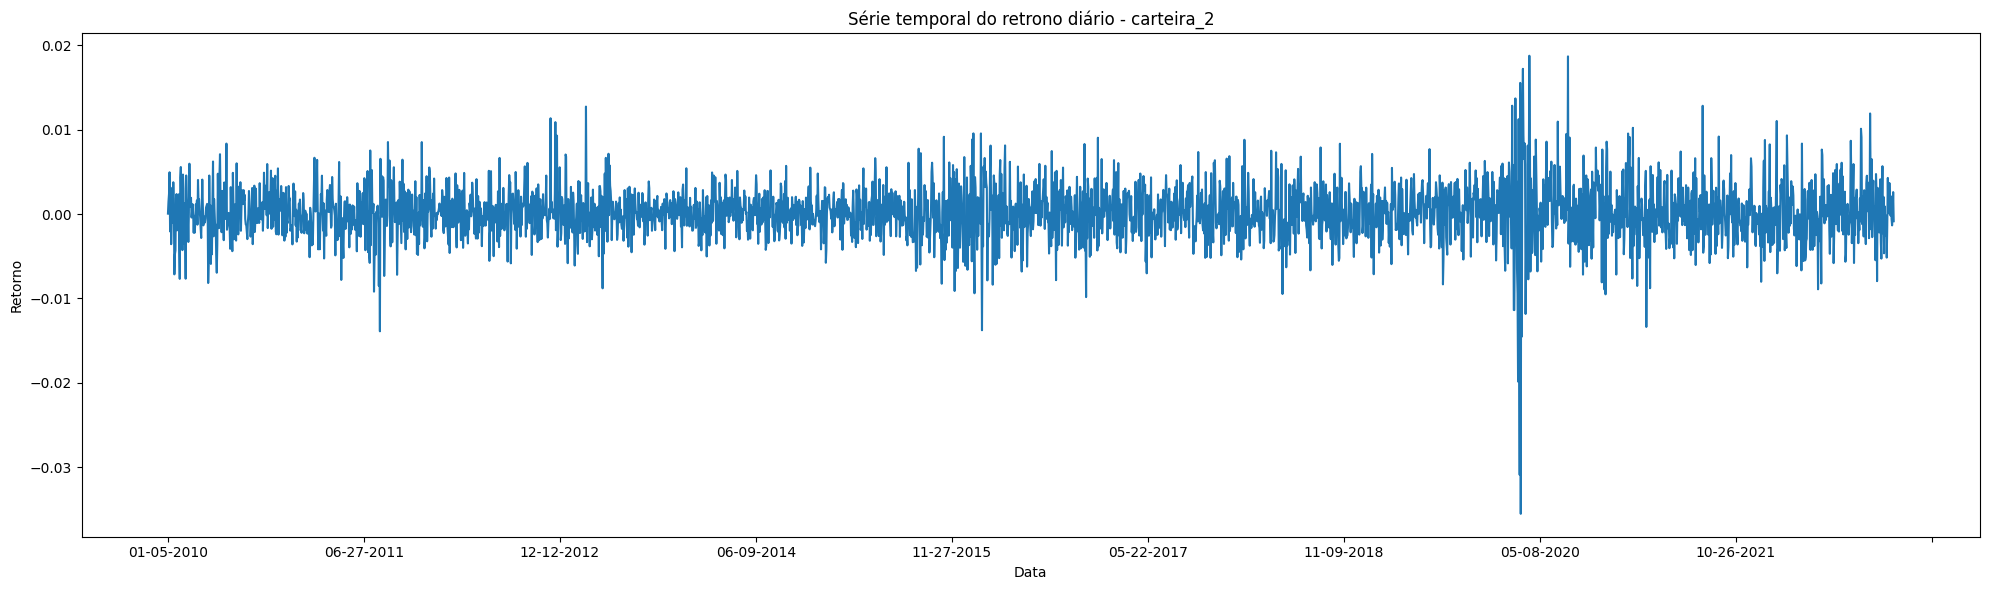

In [380]:
# Plotando a série histórica da carteira_2

serie_da_carteira2 = dataframe2.set_index('date')['carteira_2']
plot_stock(serie_da_carteira2, 'Série temporal do retrono diário - carteira_2')
plt.tight_layout()
plt.show()

Ao compararmos essa série histórica com a da primeira carteira (equally weighted), podemos perceber uma menor variação (tanto positiva quanto negativa) dos retornos ao longo do tempo.

Vejamos agora o retorno anualizado, volatiliade anualizada e máximo Drawdown dessa nossa nova carteira.

In [390]:
# Retorno anualizado

media_geometrica2 = np.prod(np.array(dataframe2['carteira_2']) + 1) ** (252 / len(dataframe['carteira_1'])) - 1
print(f'Retorno anualizado: {media_geometrica2 * 100:.3f}%') # retorno positivo

# Volatilidade anualizada

vol = (dataframe2['carteira_2'].std()) 
volan = vol * np.sqrt(252)
print(f'Volatilidade anualizada: {volan * 100:.3f}%')

# Máximo Drawdown

valor_base = 1

dataframe2['Valor_Acumulado_2'] = valor_base * (dataframe2['carteira_2'] + 1)

dataframe2['Drawdown_2'] = (dataframe2['Valor_Acumulado_2'].cummax() - dataframe2['Valor_Acumulado_2']) / dataframe2['Valor_Acumulado_2'].cummax()
max_drawdown_2 = dataframe2['Drawdown_2'].max()

print(f'Máximo Drawdown: {max_drawdown_2 * 100:.3f}%')

Retorno anualizado: 4.789%
Volatilidade anualizada: 5.188%
Máximo Drawdown: 5.031%


Se compararmos com a primeira carteira, temos que todas essas métricas são menores agora, o que faz sentido levando em conta o aumento do nosso índice de Sharpe. O gráfico a seguir nos ajuda a entender melhor essa diferença entre as duas carteiras.

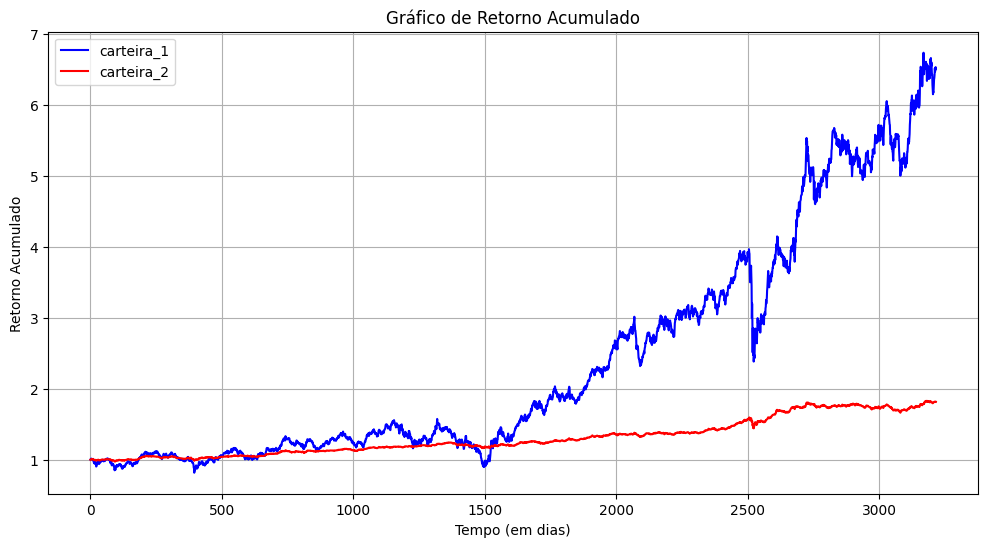

In [439]:

# Calculando o retorno acumulado das duas carteiras
dataframe['Retorno Acumulado_1'] = (1 + dataframe['carteira_1']).cumprod()
dataframe2['Retorno Acumulado_2'] = (1 + dataframe2['carteira_2']).cumprod()


# Plotando o gráfico dos retornos acumulados
plt.figure(figsize=(12, 6))
plt.plot(dataframe.index, dataframe['Retorno Acumulado_1'], label='carteira_1', color='blue')
plt.plot(dataframe2.index, dataframe2['Retorno Acumulado_2'], label='carteira_2', color='red')
plt.xlabel('Tempo (em dias)')
plt.ylabel('Retorno Acumulado')
plt.title('Gráfico de Retorno Acumulado')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

Em resumo, o Portfólio 1 exibe um retorno anualizado atraente, mas a volatilidade, o índice de Sharpe desfavorável e o máximo drawdown elevado indicam um nível de risco considerável. Por outro lado, o Portfólio 2 demonstra menor volatilidade e um máximo drawdown mais controlado, o que pode ser mais adequado para investidores que buscam uma abordagem mais conservadora.

## **5. Terceiro Cenário**

Nesta seção, vamos implementar e avaliar uma estratégia de investimento baseada em retornos acumulados mensais dos 5 ativos em questão. A estratégia consiste em calcular o retorno acumulado no final de cada mês para um conjunto de ações e escolher a ação que obteve o maior retorno. Essa ação escolhida será mantida em carteira até o final do mês seguinte, enquanto as outras ações terão peso zero.

Começaremos criando um dataframe com o retorno acumualdo mensal da carteira a partir dessa estratégia.

In [416]:
# Encontrando o retorno acumulado mensal

dataframe3 = dataframe.copy() # Criando uma cópia do dataframe

dataframe3['date'] = pd.to_datetime(dataframe3['date']) # Transformando deixando 'date' em fromato de datetime
dataframe3.set_index('date', inplace=True) # Fazendo com que 'date' seja o index do dataframe3

dataframe4 = (1 + dataframe3).groupby(pd.Grouper(freq = 'M')).prod() - 1 # Fazendo os retornos mensais acumulados
acao_escolhida = dataframe4[lista_ativos].idxmax(axis = 1) # Mostra a ação com maior retorno acumulado mensal

carteira = pd.DataFrame(index = dataframe4.index, columns = lista_ativos) # Cria um dataframe vazio para importar os pesos referentes a carteria_3

# Preenche a carteira_3_pesos com 1 para a ação escolhida
for date in acao_escolhida.index:
    action = acao_escolhida.loc[date]
    carteira.loc[date, action] = 1

# Preenche os valores ausentes (ações não escolhidas) com 0
carteira.fillna(0, inplace = True)

# RAM_carteira_3 é um dataframe que mostra o retorno mensal da carteira_3
RAM_carteira_3 = pd.DataFrame((carteira.shift(1) * dataframe4[lista_ativos]).sum(axis = 1).cumsum())
RAM_carteira_3.columns = ['RAM_carteira_3']

RAM_carteira_3

# A primeira observação de RAM_carteira_3 está inicialmente definida como 0 porque não há um mês anterior para  calcular o retorno acumulado a partir dele. A estratégia começa em um determinado mês, e é necessário um mês anterior para calcular o retorno acumulado. Portanto, a primeira observação é configurada como 0 para indicar que não há nenhuma ação escolhida no primeiro mês.

,RAM_carteira_3
date,
2010-01-31,0.000000
2010-02-28,-0.010392
2010-03-31,0.122413
2010-04-30,0.058139
2010-05-31,0.059362
...,...
2022-08-31,1.767236
2022-09-30,1.664016
2022-10-31,1.917283


Agora, como o objetivo é comparar essa estratégia com a equally weighted, iremos criar um dataframe que possua tanto os retornos mensais da primeira carteira quanto da segunda.

In [434]:
# Dataframe com os retornos mensais da carteira_1 com carteira_3

RAM_carteira_1 = dataframe3['Valor_Acumulado'].resample('M').last()
RAM_carteira_1 = pd.DataFrame({'RAM_carteira_1': RAM_carteira_1})
RAM_carteira_1 = RAM_carteira_1 -1 # Aqui estamos usando a mesma técnica utilizada para cálculo do MMD, mas agora o intuito é ter uma comparação válida entre as duas séries históricas

df_comparativo = pd.merge(RAM_carteira_1, RAM_carteira_3, left_index = True, right_index = True) # Justa as duas bases numa só
df_comparativo = df_comparativo.iloc[1:] # Remove a primeira observação, já que a mesma é 0 para carteria_3

df_comparativo


,RAM_carteira_1,RAM_carteira_3
date,,
2010-02-28,0.006629,-0.010392
2010-03-31,0.002433,0.122413
2010-04-30,-0.005600,0.058139
2010-05-31,0.018618,0.059362
2010-06-30,-0.017533,0.118426
...,...,...
2022-08-31,-0.003837,1.767236
2022-09-30,0.027200,1.664016
2022-10-31,0.000253,1.917283


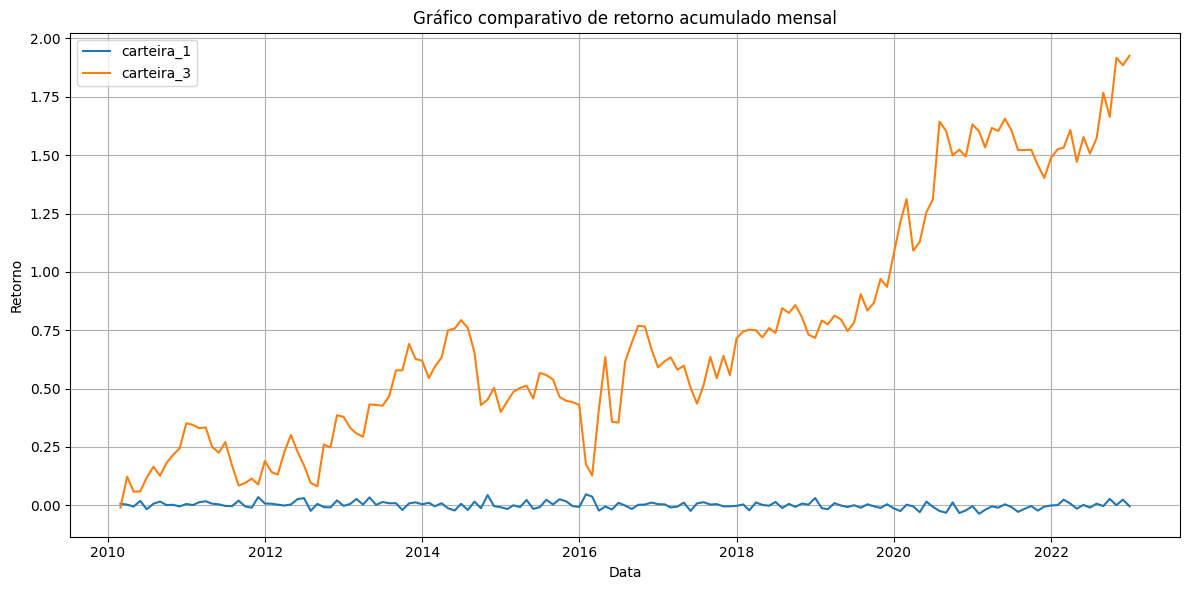

In [438]:
# PLotando o gráfico comparativo de retorno acumulado mensal

# Extrai as colunas do DataFrame
ram_carteira_1 = df_comparativo['RAM_carteira_1']
ram_carteira_3 = df_comparativo['RAM_carteira_3']

# Cria um gráfico de linha comparando as duas séries temporais
plt.figure(figsize=(12, 6)) 
plt.plot(df_comparativo.index, ram_carteira_1, label = 'carteira_1', linestyle = '-')
plt.plot(df_comparativo.index, ram_carteira_3, label = 'carteira_3', linestyle = '-')

# Adiciona rótulos de eixo e título
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.title('Gráfico comparativo de retorno acumulado mensal')
 
# Adiciona uma legenda
plt.legend()

# Mostra o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do gráfico acima, que compara o retorno acumulado mensal das duas carteiras, é possível afirmar que manter apenas os ativos com maior retorno mensal no portfólio até o início do mês subsequente é melhor do que montar uma carteira com todos os ativos com peso constante e igual ao longo do tempo. É importante destacar que uma abordagem de investimento bem-sucedida não se limita apenas ao retorno, mas também à gestão do risco. Portanto, métricas como o índice de Sharpe, que avaliam o trade-off entre risco e retorno, devem ser levadas em consideração na tomada de decisões.

## **6. Considerações finais** 

### 6.1.1 Quanto ao cálculo do índice de Sharpe no segundo caso

Quando se trata de uma carteira onde os ativos nela presente possuem pesos diferentes, a variância da mesma, diferentemente do retorno esperado, 
não é uma média ponderada das variâncias dos ativos individuais, sendo representada por:

$ \sigma_p^2 = \sum_{i \in L} \sum_{j \in L} w_i w_j  \text{Cov}(r_i,r_j), \ \ \ \text{com } i \not = j\ \ \ $

No entanto, ao calcular o desvio padrão da carteira usando essa variância na fórmula do Índice de Sharpe, obtive resultados que não eram viáveis. Portanto, decidi, por razões práticas, utilizar a média ponderada das variâncias dos ativos mesmo assim, a fim de permitir uma análise mais factível.

### 6.1.1 Quanto à otimização dos códigos

Gostaria de ressaltar que, durante o desenvolvimento do material, elaborei os códigos apresentados da melhor forma possível, considerando as limitações de tempo e recursos disponíveis. Tenho consciência de que alguns deles podem não estar totalmente otimizados, como por exemplo o cálculo dos pesos ideais para maximizar o valor de Sharpe, no qual fui obrigado a adicionar manualmente os valores das variáveis e "escrever" de forma direta a fórmula do índice de Sharpe, o que não representa a abordagem ideal em termos de eficiência de código.

### 6.1.1 Erros de análise

No ítem 2, o índice de sharpe encontrado é negativo pois na hora de calcular o retorno estou multiplicando pelo peso e tirando a média, quando deveria ter somado já que os pesos já estavam normalizados. Por isso, a volatilidade foi tão baixa, pois o total de pesos alocados ficou em apenas 20%.

## **7. Referências**

Bibliografia
B3. Volatilidade dos Ativos. Disponível em: <https://bvmf.bmfbovespa.com.br/cias-listadas/volatilidade-ativos/ResumoVolatilidadeAtivos.aspx?metodo=padrao&periodo=3Meses&codigo=petr4&idioma=pt-br>. Acesso em: 2 set. 2023.


FREITAS, S. G. E. Capítulo 4 Análise de Retornos. Disponível em: <https://sillasgonzaga.github.io/curso_r_financas/returns.html>. Acesso em: 2 set. 2023.


LOQUE, F. Estatística Descritiva com Ações. Com.brBlogger, , 2 set. 2020. Disponível em: <https://www.minadedados.com.br/2020/09/estatistica-descritiva-aplicada-em-acoes.html>. Acesso em: 3 set. 2023


MARCUS; BODIE, A.; KANE, A. Investments. [s.l.] Mosby-Year Book, 1989.


NICKEL. drawdown –. Disponível em: <https://drnickel.wordpress.com/tag/drawdown/>. Acesso em: 1 set. 2023.


QUANTECON. QuantEcon. Disponível em: <https://quantecon.org>. Acesso em: 1 set. 2023.


SEMBAY, F. Análise de Carteira de investimento utilizando Python. Disponível em: <https://www.linkedin.com/pulse/an%C3%A1lise-de-carteira-investimento-utilizando-python-felipe-sembay/>. Acesso em: 3 set. 2023.


STATMAN, M. How many stocks make a diversified portfolio? Journal of financial and quantitative analysis, v. 22, n. 3, p. 353, 1987.


TREYNOR, J. L.; BLACK, F. How to use security analysis to improve portfolio selection. The journal of business, v. 46, n. 1, p. 66, 1973.

